# Lab experiment
### You are a scientist who is working at Copenhagen University. Your research project is about identifying gases that reduce the global warming potential of greenhouse gases. In your most recent experiment you mixed two different gases. The chemical reaction made the temperature in the reaction tube vary over time, which was measured with 3 different thermometers. You're now back in your office and ready to analyse your data, which is available in a csv file

### The exercise might seem like a lot, but don't worry. Most of the visualisation questions were already solved during the exercises session or you can find help in the lecture notebook. If you don't understand some questions or need help, please ask for help in the Slack channel or ping one of the teachers directly.

### Hint: it might be a good idea to label each figure according to the equastions that you're solving. For example, a reasonable name for the figure in question c) could be figc. 

#### a) Import the dataset into a pandas DataFrame. Convert the time column into a pandas.Timestamp object. 

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('data/temperature_signals.csv')
df["time"]=pd.to_datetime(df["time"], format="%Y-%m-%d %H:%M:%S")
df

,time,temp1,temp2,temp3
0,2021-05-04 17:10:01,10.9934,NaN,13.6496
1,2021-05-04 17:10:02,10.7878,NaN,14.7106
2,2021-05-04 17:10:03,10.2174,12.0238,13.4136
3,2021-05-04 17:10:04,11.6362,12.9300,14.3805
4,2021-05-04 17:10:05,10.7618,13.7138,11.2065
...,...,...,...,...
995,2021-05-04 17:26:36,NaN,15.6293,15.1451
996,2021-05-04 17:26:37,13.3439,16.1486,15.5092
997,2021-05-04 17:26:38,13.4219,NaN,12.5129
998,2021-05-04 17:26:39,NaN,16.0288,15.6668


#### b) Inspect the dataset. Are there any missing values? If yes, how many are missing? Can you say anything more about the missing values?

In [5]:
df.isnull().sum()

time       0
temp1     50
temp2     56
temp3    151
dtype: int64

#### c) Now visualise each of the 3 temperature signals.
- First, you want to create a figure with 3 different axes instances, one axis instance for each temperature signal
- Then you visualize each signal. Do you use a scatter or line plot? Try to justify your choice with a couple of words
- Because you want to discuss your experiment with your colleagues, you also want to make the figure pretty. Label each of the axes with information that you consider important

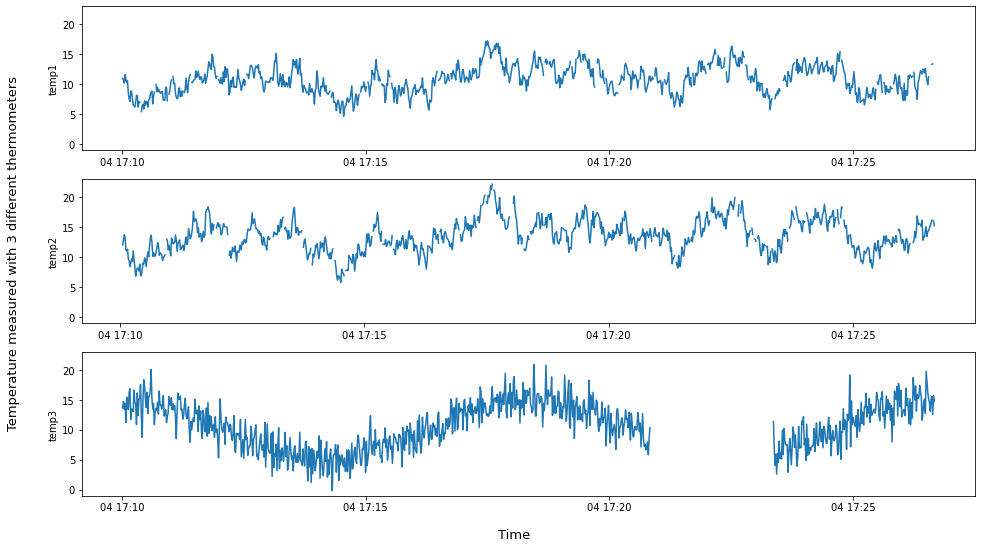

In [8]:
figc, axs = plt.subplots(3,figsize=(16,9))
ylabels = ["temp1","temp2","temp3"]

for i, ax in enumerate(axs.flat):
    ax.plot(df.time, df.iloc[:,i+1])
    ax.set_ylabel(ylabels[i])
    ax.set_ylim([-1, 23])
    
# easy to find missing data

sup_xlabel = "Time"
sup_ylabel = "Temperature measured with 3 different thermometers"
figc.text(0.5, 0.06, sup_xlabel, fontsize=13, ha='center')
figc.text(0.06, 0.5, sup_ylabel, fontsize=13, va='center', rotation='vertical')

plt.show()


#### d) Explain in your own words how the data looks like. Don't be too specific, try to "explain" the big picture in 2-3 sentences. HINT: don't focus only on the missing data

In [5]:
# The thermometer 3 didn't work for about 3 mins.
# The temperatures recorded from thermometers 1&2 follow quite similar patterns.
# The amplitudes of temperatures vary.

#### e) Now create one figure with one axis element to visualise the temperature of signal 1 and 2 in one coordinate system. Don't forget to label your x- and y-axis

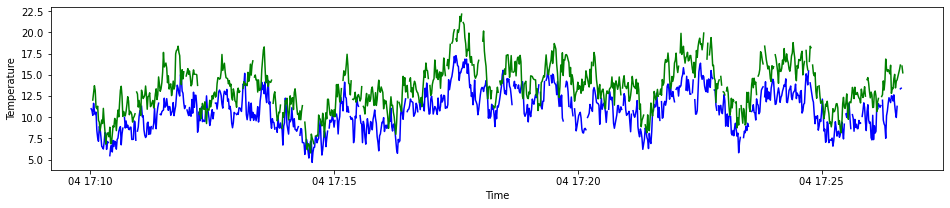

In [6]:
fige, ax_temp1_2 = plt.subplots(figsize=(16,3))

ax_temp1_2.plot(df.time, df.temp1, color='blue')
ax_temp1_2.plot(df.time, df.temp2, color='green')

ax_temp1_2.set_xlabel("Time")
ax_temp1_2.set_ylabel("Temperature")
plt.show()

#### f) Describe in 1-2 sentences what you now see 

In [7]:
# Temperature recorded from thermometer 1 is lower than that of thermometer 2.
# The two lines follow quite similar pattern

#### g) Create another figure to use a scatter plot to visualize temperature signal 1 and 2

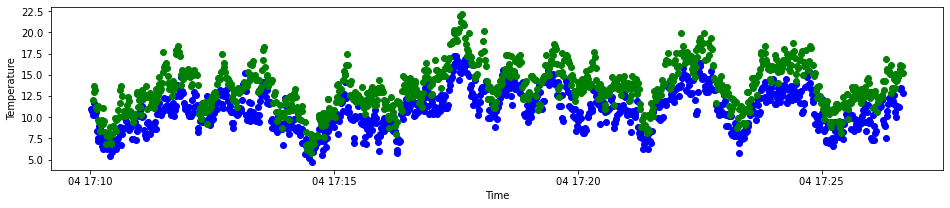

In [8]:
fige, ax_temp1_2 = plt.subplots(figsize=(16,3))

ax_temp1_2.scatter(df.time, df.temp1, color='blue')
ax_temp1_2.scatter(df.time, df.temp2, color='green')

ax_temp1_2.set_xlabel("Time")
ax_temp1_2.set_ylabel("Temperature")
plt.show()



#### h) There seems to be a pattern. Try to describe it in 1-2 sentences

In [ ]:
# The data follow quite a same pattern.
# The temperature recorded from the themo 2 is higher than that of thermo 1.

#### i) What do you see if you plot the temperature of signal 1 against the temperature of signal 3. Use again a scatter plot and try to describe what you see

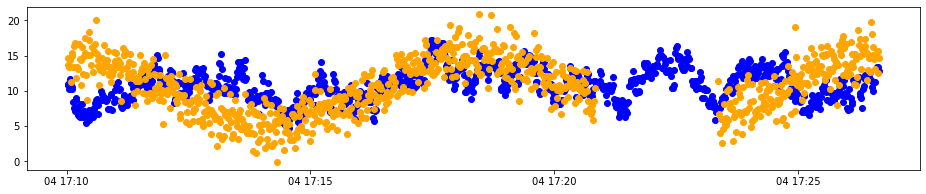

In [9]:
fige, ax_temp1_3 = plt.subplots(figsize=(16,3))

ax_temp1_3.scatter(df.time, df.temp1, color='blue')
ax_temp1_3.scatter(df.time, df.temp3, color='orange')

# The patern recorded in thermo 3 is less fluctuated.
# The thermo 1 and 3 recorded nearly the same temperature in nearly 1/3 of the period.

#### j) Next week you'll have a meeting with the laboratory supervisor. You're not happy that your dataset contains some missing values. You think that it could be related sensor malfunction. Because you know that the laboratory supervisor doesn't like plain numbers, you try to come up with a nice visualisation that shows the percentage of missing values for each of the 3 temperature signals. If you need some inspiration have a look at https://matplotlib.org/stable/gallery/index.html

In [10]:
# Create new data set of percentage of missing values:
null_data = df.isnull().sum().to_frame() #converting series to data frame
null_data.drop("time", inplace=True)
null_data.rename(columns={0:"null"}, inplace=True)
null_data["valuable"]= 1000 - null_data.null
null_data

,null,valuable
temp1,50,950
temp2,56,944
temp3,151,849


In [ ]:
# Solution 2: Bar chart
new_order = null_data.reindex(columns=["valuable","null"])

ax_bar = new_order.plot.barh(stacked=True, color=["#27B69A", "#EE5C75"])
ax_bar.set_xlabel("Total data recorded")

ax_bar.legend(labels=["Valuable data", "Null data"], loc="best", fontsize=10)
ax_bar.set_title("Percentage of null data recorded by 3 thermometers", fontsize=14, y=1.1)

for i, (value,null) in enumerate(zip(new_order.valuable, new_order.null)):
    null_pct = null/1000*100
    value_pct = 100-null_pct
    ax_bar.text(value/2, i, f"{value_pct}%")
    ax_bar.text(value+5, i+0.3, f"{round(null_pct,1)}%")
  
plt.show()


In [ ]:
# Solution 1: Pie chart
fig_pie, ax_pies = plt.subplots(1, 3, figsize=(22,9))

for i, ax_pie in enumerate(ax_pies.flat):
    ax_pie.pie(null_data.iloc[i,:], autopct='%.1f%%', textprops={'size': '11.5'}, pctdistance=0.7,
               colors=["#EE5C75","#27B69A"], startangle=90, counterclock=False)
    ax_pie.set_title(f"Thermometer {i+1}", y=0, fontsize=13)

fig_pie.legend(labels=["Null data", "Valuable data"], bbox_to_anchor=(0.9, 0.85), fontsize=12)
fig_pie.suptitle("Percentage of null data recorded by 3 thermometers", fontsize =18, y=0.85)

plt.show()

#### k) The laboratory supervisor doesn't like looking at plots in jupyter notebooks. To improve the likelihood that she'll have a look to see if there's something wrong with the temperature sensors you'll plan to create a nice slide deck. For that you need to export your visualisation (figure) as a png/pdf file. Hint: have a look at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html and save your figure as a png or pdf file. Make sure that you specify the path correctly and check if you're able to open the created file. Does the visualisation look good?

In [ ]:

fig_pie.savefig("Percentage of null data.png", dpi=150)
fig_bar = ax_bar.get_figure()
fig_bar.savefig("Percentage of null data - bar.png", dpi=150)

#### Bonus question: what would you do about the missing values of temperature signal 3? Are there any reasonable approaches to fill in values for missing timestamps? 